<a href="https://colab.research.google.com/github/Morningspread/MITACS1/blob/main/Sample_BCData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample Working Data Set

In [54]:
#importing Pandas, Numpy and Matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import sklearn 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from matplotlib import pyplot as plt
from sklearn import  metrics
#print("scikit-learn version: %s" %sklearn.__version__)
# We want to max out the display here
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Creating a working Data Set

In [55]:
data= {  "age": ["early","middle","old"],
  "men_count": [505,1425,633],
  "women_count": [529,1355,553]}
df=pd.DataFrame(data)
df

,age,men_count,women_count
0,early,505,529
1,middle,1425,1355
2,old,633,553


In [56]:
def datagenarator(age,malecount,feamlecount):
  Gender=np.repeat(("M","F"), (malecount,feamlecount))
  a=np.repeat(age,malecount+feamlecount)
  #p=np.repeat(province,malecount+feamlecount)
  df=pd.DataFrame(Gender,a)
  df.reset_index(inplace=True)
  df.columns = ["Age",'Gender',]
  #df['Gender'] = Gender
  return df

In [57]:
import random
rng = np.random.default_rng()
dfs=[]
for i, row in df.iterrows():
  #province=row['GEO_NAME']
  age=row['age']
  malecount=row['men_count']
  feamlecount=row['women_count']
  df=datagenarator( age, malecount, feamlecount)
  dfs.append(df)
master_df = pd.concat(dfs,axis=0,ignore_index=True)

In [58]:
df=master_df
print(df.tail())
df.shape

      Age Gender
4995  old      F
4996  old      F
4997  old      F
4998  old      F
4999  old      F


(5000, 2)

In [59]:
def ds(df_row):
  if df_row['Age'] == 'early':
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=8.16, size=1)
      ds=ds[0]
      ds=round(ds,2)
    else:
      ds=np.random.exponential(scale=11.27, size=1)
      ds=ds[0]
      ds=round(ds,2)
  elif df_row['Age'] == 'middle':
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=8.71, size=1)
      ds=ds[0]
      ds=round(ds,2)
    else:
      ds=np.random.exponential(scale=8.72, size=1)
      ds=ds[0]
      ds=round(ds,2)
  else:
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=5.61, size=1)
      ds=ds[0]
      ds=round(ds,2)
    else:
      ds=np.random.exponential(scale=7, size=1)
      ds=ds[0]
      ds=round(ds,2)
  return ds

In [60]:
df["Depression score"] = df.apply(ds, axis=1)
import random
#df.loc[df['Depression score']<8] = 8 #round(random.uniform(8,10),2)
df.loc[df['Depression score']>32] = 8.16 
df.tail()

,Age,Gender,Depression score
4995,old,F,7.93
4996,old,F,13.65
4997,old,F,0.68
4998,old,F,0.35
4999,old,F,4.78


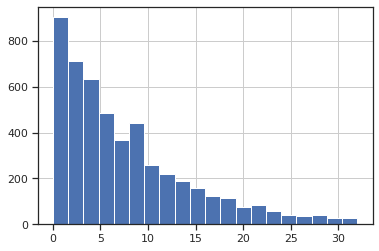

In [61]:
df['Depression score'].hist(bins=20)

In [62]:
x=df['Depression score'].values
x=x.tolist()
x=np.array(x)
x.ndim

1

In [63]:
x1 = x.reshape(1, 5000)
x1.ndim

2

In [64]:
"""Example of generating correlated exponentially distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 5000

# The desired covariance matrix.
r = np.array([
        [  1, 0.68],
        [ 0.68,  1],
    ])

# Generate samples from three independent exponentially distributed random
# variables (with mean 0 and std. dev. 1).
#x = norm.rvs(size=(3, num_samples))
#x1 = np.random.exponential(scale=8.16, size= (1,num_samples))
x2 = np.random.exponential(scale=8, size= (1, num_samples))
x  = np.concatenate((x1, x2), axis=0)

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

In [65]:
from numpy.lib.shape_base import column_stack
dfc=pd.DataFrame(y)
dfc=dfc.T
dfc.columns=['Lonliness Score','PHQ-9']
print(dfc.head())
print(dfc.shape)
dfc.corr()

   Lonliness Score      PHQ-9
0             1.44  22.857389
1             2.72   2.616473
2             2.66   7.335971
3             2.73   8.265000
4             3.37  14.200185
(5000, 2)


,Lonliness Score,PHQ-9
Lonliness Score,1.000000,0.613379
PHQ-9,0.613379,1.000000


,Lonliness Score,PHQ-9
0,1.44,22.86
1,2.72,2.62
2,2.66,7.34
3,2.73,8.26
4,3.37,14.20


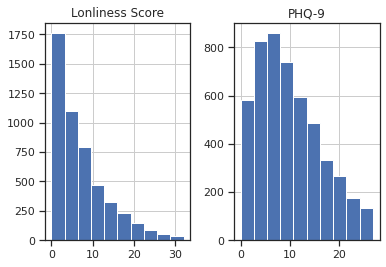

In [66]:
dfc.loc[dfc['PHQ-9']>27] = 0 
dfc['PHQ-9']=dfc['PHQ-9'].round(2)
dfc.hist()
dfc.head()

Text(0, 0.5, 'PHQ-9')

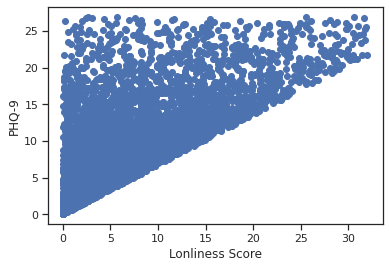

In [67]:
plt.scatter(dfc['Lonliness Score'],dfc['PHQ-9'])
plt.xlabel('Lonliness Score')
plt.ylabel('PHQ-9')

In [68]:
df=df.drop(['Depression score'], axis=1)
df=pd.concat([df,dfc], axis=1)
df

,Age,Gender,Lonliness Score,PHQ-9
0,early,M,1.44,22.86
1,early,M,2.72,2.62
2,early,M,2.66,7.34
3,early,M,2.73,8.26
4,early,M,3.37,14.20
...,...,...,...,...
4995,old,F,7.93,11.77
4996,old,F,13.65,10.86
4997,old,F,0.68,1.06
4998,old,F,0.35,0.60


In [69]:
'''AgeList=["early","middle","old"]
for i in AgeList:
  master_df.loc[df['Age']==i].hist(bins=100, legend="i")
#master_df.loc[master_df['Age']=="middle"].hist(bins=100)
#master_df.loc[master_df['Age']=="old"].hist(bins=100)'''

'AgeList=["early","middle","old"]\nfor i in AgeList:\n  master_df.loc[df[\'Age\']==i].hist(bins=100, legend="i")\n#master_df.loc[master_df[\'Age\']=="middle"].hist(bins=100)\n#master_df.loc[master_df[\'Age\']=="old"].hist(bins=100)'

In [70]:
'''from scipy.stats import pearsonr
from scipy.optimize import minimize


df['BaselinePHQ-9'] = minimize(lambda x: abs(0.61 - pearsonr(df['Depression score'], x)[0]), 
                             np.random.rand(len(df['Depression score']))).x'''

"from scipy.stats import pearsonr\nfrom scipy.optimize import minimize\n\n\ndf['BaselinePHQ-9'] = minimize(lambda x: abs(0.61 - pearsonr(df['Depression score'], x)[0]), \n                             np.random.rand(len(df['Depression score']))).x"

In [71]:
df.head()

,Age,Gender,Lonliness Score,PHQ-9
0,early,M,1.44,22.86
1,early,M,2.72,2.62
2,early,M,2.66,7.34
3,early,M,2.73,8.26
4,early,M,3.37,14.20


In [72]:
"""Example of generating correlated exponentially distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 5000

# The desired covariance matrix.
r = np.array([
        [  1, 0.65],
        [ 0.65,  1],
    ])

# Generate samples from three independent exponentially distributed random
# variables (with mean 0 and std. dev. 1).
#x = norm.rvs(size=(3, num_samples))
#x1 = np.random.exponential(scale=8.16, size= (1,num_samples))
x3 = np.random.exponential(scale=10, size= (1, num_samples))
x  = np.concatenate((x1, x3), axis=0)

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

In [73]:
from numpy.lib.shape_base import column_stack
dfd=pd.DataFrame(y)
dfd=dfd.T
dfd.columns=['Lonliness Score','GAD-7']
print(dfd.head())
print(dfd.shape)
print(dfd.corr())
dfd=round(dfd[['GAD-7']],2)
dfd.loc[dfd['GAD-7']>21] = 0 

   Lonliness Score      GAD-7
0             1.44  21.442579
1             2.72   2.132511
2             2.66   5.056124
3             2.73   4.778015
4             3.37   3.864788
(5000, 2)
                 Lonliness Score     GAD-7
Lonliness Score         1.000000  0.493106
GAD-7                   0.493106  1.000000


In [74]:
df=pd.concat([df,dfd], axis=1)
df

,Age,Gender,Lonliness Score,PHQ-9,GAD-7
0,early,M,1.44,22.86,0.00
1,early,M,2.72,2.62,2.13
2,early,M,2.66,7.34,5.06
3,early,M,2.73,8.26,4.78
4,early,M,3.37,14.20,3.86
...,...,...,...,...,...
4995,old,F,7.93,11.77,13.04
4996,old,F,13.65,10.86,15.28
4997,old,F,0.68,1.06,0.00
4998,old,F,0.35,0.60,15.58


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6e4e1b390>,
      dtype=object)

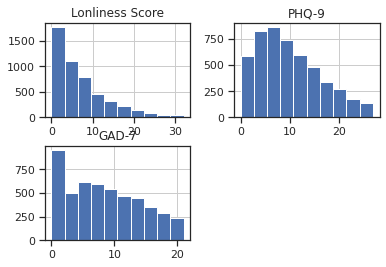

In [75]:
df.hist()

In [76]:
df=pd.get_dummies(df,columns=['Gender'])
df

,Age,Lonliness Score,PHQ-9,GAD-7,Gender_8.16,Gender_F,Gender_M
0,early,1.44,22.86,0.00,0,0,1
1,early,2.72,2.62,2.13,0,0,1
2,early,2.66,7.34,5.06,0,0,1
3,early,2.73,8.26,4.78,0,0,1
4,early,3.37,14.20,3.86,0,0,1
...,...,...,...,...,...,...,...
4995,old,7.93,11.77,13.04,0,1,0
4996,old,13.65,10.86,15.28,0,1,0
4997,old,0.68,1.06,0.00,0,1,0
4998,old,0.35,0.60,15.58,0,1,0


In [77]:
df.describe()

,Lonliness Score,PHQ-9,GAD-7,Gender_8.16,Gender_F,Gender_M
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.073136,9.968830,8.301192,0.026200,0.470800,0.503000
std,6.530422,6.409092,5.951394,0.159746,0.499197,0.500041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.987500,4.997500,3.427500,0.000000,0.000000,0.000000
50%,5.180000,8.820000,7.810000,0.000000,0.000000,1.000000
75%,10.210000,14.202500,12.880000,0.000000,1.000000,1.000000
max,32.000000,26.960000,21.000000,1.000000,1.000000,1.000000


Linear Regression to predict PHQ-9

Text(0.5, 1.0, 'Multiple Linear Regression')

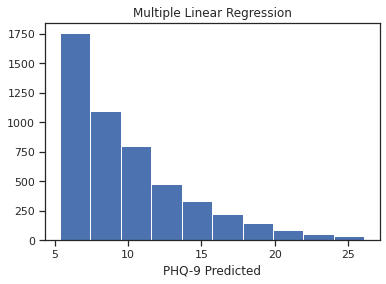

In [78]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X=df[['Lonliness Score','Gender_F','Gender_M']]
y1=df['PHQ-9']
reg.fit(X,y1)
y1pred=reg.predict(X)
plt.hist(y1pred)
plt.xlabel("PHQ-9 Predicted")
plt.title("Multiple Linear Regression")


Text(0.5, 1.0, 'Multiple Linear Regression')

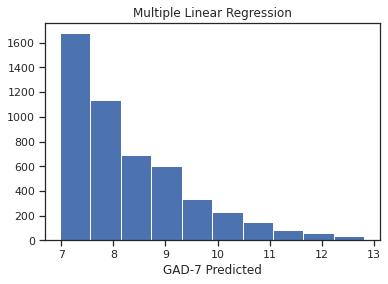

In [79]:
y2=df['GAD-7']
reg.fit(X,y2)
y2pred=reg.predict(X)
plt.hist(y2pred)
plt.xlabel("GAD-7 Predicted")
plt.title("Multiple Linear Regression")